In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = {
    'RM': [6.5, 7.0, 6.0, 5.5, 7.2],
    'LSTAT': [12.5, 10.0, 15.0, 20.0, 8.0],
    'AGE': [60, 45, 80, 90, 40],
    'MEDV': [24, 30, 22, 19, 35]
}
df = pd.DataFrame(data)
df

,RM,LSTAT,AGE,MEDV
0,6.5,12.5,60,24
1,7.0,10.0,45,30
2,6.0,15.0,80,22
3,5.5,20.0,90,19
4,7.2,8.0,40,35


In [5]:
X = df[['RM', 'LSTAT', 'AGE']].values
y = df['MEDV'].values
X, y

(array([[ 6.5, 12.5, 60. ],
        [ 7. , 10. , 45. ],
        [ 6. , 15. , 80. ],
        [ 5.5, 20. , 90. ],
        [ 7.2,  8. , 40. ]]),
 array([24, 30, 22, 19, 35]))

In [7]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

In [8]:
X

array([[ 0.09553946, -0.14367394, -0.15471319],
       [ 0.89170166, -0.74231537, -0.92827912],
       [-0.70062273,  0.45496749,  0.87670806],
       [-1.49678492,  1.65225034,  1.39241868],
       [ 1.21016654, -1.22122851, -1.18613443]])

In [9]:
X = np.c_[np.ones(X.shape[0]), X]

In [10]:
X

array([[ 1.        ,  0.09553946, -0.14367394, -0.15471319],
       [ 1.        ,  0.89170166, -0.74231537, -0.92827912],
       [ 1.        , -0.70062273,  0.45496749,  0.87670806],
       [ 1.        , -1.49678492,  1.65225034,  1.39241868],
       [ 1.        ,  1.21016654, -1.22122851, -1.18613443]])

In [11]:
m, n = X.shape
theta = np.zeros(n)
alpha = 0.01
epochs = 1000

In [12]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


In [13]:
cost_history = []

for epoch in range(epochs):
    predictions = X @ theta
    error = predictions - y
    
    gradients = (1 / m) * (X.T @ error)
    theta -= alpha * gradients
    
    cost = compute_cost(X, y, theta)
    cost_history.append(cost)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost:.4f}")


Epoch 0, Cost: 346.9919
Epoch 100, Cost: 45.9496
Epoch 200, Cost: 7.4766
Epoch 300, Cost: 2.3252
Epoch 400, Cost: 1.6338
Epoch 500, Cost: 1.5400
Epoch 600, Cost: 1.5262
Epoch 700, Cost: 1.5233
Epoch 800, Cost: 1.5218
Epoch 900, Cost: 1.5205


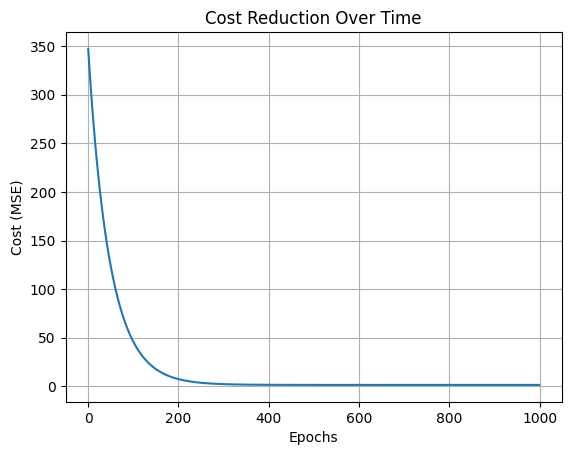

In [14]:
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost Reduction Over Time")
plt.grid(True)
plt.show()


In [15]:
# Predict new house: RM=6.1, LSTAT=13, AGE=70
new_data = np.array([[6.1, 13.0, 70]])
new_data = (new_data - X_mean) / X_std
new_data = np.c_[np.ones(new_data.shape[0]), new_data]

predicted_price = new_data @ theta
print(f"Predicted MEDV: ${predicted_price[0] * 1000:.2f}")


Predicted MEDV: $24228.88
